<a href="https://colab.research.google.com/github/siddh113/Pneumonia-Detection-Using-Deep-Learning-From-Chest-X-Ray/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset from the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pre determining the batch size to estimate the error gradient

Batch_size = 32
Seed = 42

In [ ]:
chestXray_path = '/content/drive/MyDrive/Colab Notebooks/chest_xray'

train_path = os.path.join(chestXray_path,"train")
test_path=os.path.join(chestXray_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-3269314-0001.jpeg
1,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-3243013-0001.jpeg
2,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-3333785-0002.jpeg
3,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-3570271-0001.jpeg
4,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-3518933-0002.jpeg
...,...,...
5228,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4331869-0001.jpeg
5229,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4213815-0003.jpeg
5230,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4152314-0002.jpeg
5231,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4170270-0003.jpeg


In [ ]:
df_test

,class,image
0,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg
1,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL-1212407-0001.jpeg
2,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL-11419-0001.jpeg
3,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL-1160949-0001.jpeg
4,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL-115218-0001.jpeg
...,...,...
619,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/VIRUS-8574414-0001.jpeg
620,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/VIRUS-9240664-0001.jpeg
621,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/VIRUS-9968655-0001.jpeg
622,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/VIRUS-9018258-0001.jpeg


##**EXPLORATION OF DATA**

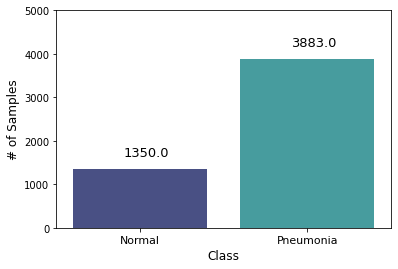

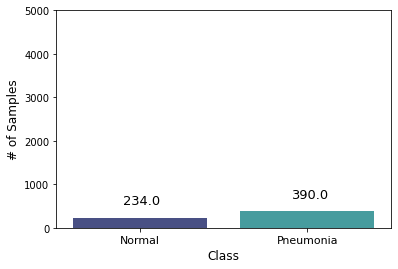

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()


plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

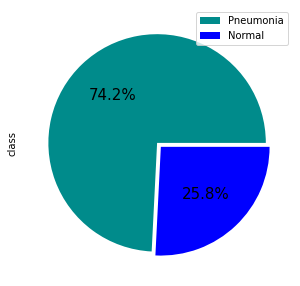

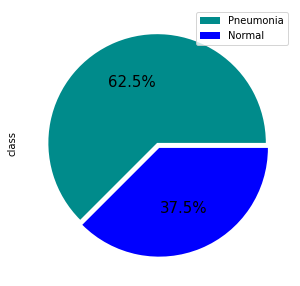

In [ ]:
plt.figure(figsize=(7,5))
df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()


plt.figure(figsize=(7,5))
df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

# Preparation of the dataset for model building

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = Seed, stratify = df_train['class']) #Using 20% to create validation dataset

In [ ]:
train_df

,class,image
3567,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4816687-0002.jpeg
2867,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-9613278-0001.jpeg
1769,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/VIRUS-5715030-0001.jpeg
1199,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-2460811-0002.jpeg
4200,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-7433321-0001.jpeg
...,...,...
3500,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4719778-0003.jpeg
678,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-7824011-0001.jpeg
3683,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-5366209-0001.jpeg
4199,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-6660139-0002.jpeg


In [ ]:
val_df

,class,image
2946,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-9203081-0001.jpeg
4879,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-324273-0007.jpeg
3178,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/VIRUS-2358368-0003.jpeg
627,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-7323530-0002.jpeg
3060,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-990412-0003.jpeg
...,...,...
896,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-9424515-0001.jpeg
4316,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-828649-0004.jpeg
1240,Normal,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/NORMAL/NORMAL-2528215-0001.jpeg
3418,Pneumonia,/content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/BACTERIA-4091020-0001.jpeg


In [ ]:
# https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

Image_size = 244

DataGen_training = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

DataGen_validation = ImageDataGenerator(rescale=1/255.)

dict_train = DataGen_training.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (Image_size, Image_size),
                                             class_mode = 'binary',
                                             batch_size = Batch_size,
                                             seed = Seed)

dict_val = DataGen_validation.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (Image_size, Image_size),
                                            class_mode = 'binary',
                                            batch_size = Batch_size,
                                            seed = Seed)

dict_test = DataGen_validation.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (Image_size, Image_size),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4186 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
# from sklearn.utils import class_weight

# class_weights = {0: 2.0, 1: 1.0}

# **Building a Convolutional Layer Model**

In [ ]:
def get_cnn_model():

    inputs = layers.Input(shape=(Image_size, Image_size, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model_cnn = keras.Model(inputs=[inputs], outputs=output)

    return model_cnn

## Convolutional Model Summary

In [ ]:
keras.backend.clear_session()

model = get_cnn_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=0.00001), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 242, 242, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 242, 242, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 242, 242, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 121, 121, 16)      0     

In [ ]:
history_cnn = model.fit(dict_train,
          batch_size = Batch_size, epochs = 15,
          validation_data=dict_val,
          steps_per_epoch=(len(train_df)/Batch_size),
          validation_steps=(len(val_df)/Batch_size));

Epoch 1/15
130/130 [==============================] - 505s 4s/step - loss: 0.5398 - binary_accuracy: 0.7647 - val_loss: 0.8021 - val_binary_accuracy: 0.7421
Epoch 2/15
130/130 [==============================] - 110s 844ms/step - loss: 0.3671 - binary_accuracy: 0.8359 - val_loss: 1.3745 - val_binary_accuracy: 0.7421
Epoch 3/15
130/130 [==============================] - 110s 843ms/step - loss: 0.3125 - binary_accuracy: 0.8586 - val_loss: 1.4221 - val_binary_accuracy: 0.7421
Epoch 4/15
130/130 [==============================] - 110s 844ms/step - loss: 0.2879 - binary_accuracy: 0.8731 - val_loss: 0.8885 - val_binary_accuracy: 0.7431
Epoch 5/15
130/130 [==============================] - 110s 844ms/step - loss: 0.2549 - binary_accuracy: 0.8954 - val_loss: 0.3422 - val_binary_accuracy: 0.8290
Epoch 6/15
130/130 [==============================] - 111s 846ms/step - loss: 0.2321 - binary_accuracy: 0.8989 - val_loss: 0.1762 - val_binary_accuracy: 0.9341
Epoch 7/15
130/130 [=======================

##**Evaluating the performance of the model on the testing dataset**

In [ ]:
score = model.evaluate(dict_val, steps = len(val_df)/Batch_size, verbose = 0)
print('Val loss:', score[0]*100, '%')
print('Val accuracy:', score[1]*100, '%')

Val loss: 18.648897111415863 %
Val accuracy: 91.97707772254944 %


In [ ]:
score = model.evaluate(dict_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0]*100, '%')
print('Test accuracy:', score[1]*100, '%')

Test loss: 21.073627471923828 %
Test accuracy: 90.70512652397156 %


##**Plotting Losses (Training dataset vs. Valdiation dataset) where X axis are the epochs**

<Axes: >

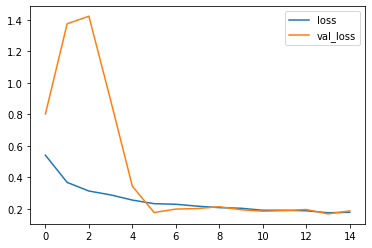

In [ ]:
losses = pd.DataFrame(history_cnn.history)
losses
losses[['loss', 'val_loss']].plot()

##**Plotting Accuracy (Training dataset vs. Valdiation dataset) where X axis are the epochs**

<Axes: >

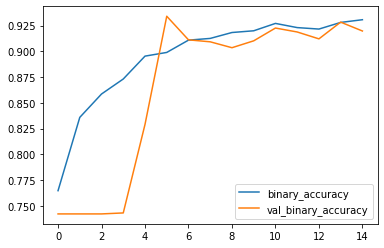

In [ ]:
losses[['binary_accuracy', 'val_binary_accuracy']].plot()

**Prediction of the Samples using the trained cnn model**

In [ ]:
num_label_cnn = {'Normal': 0, 'Pneumonia' : 1}
Y_test_cnn = df_test['class'].copy().map(num_label_cnn).astype('int')

In [ ]:
dict_test.reset()
predictions_cnn = model.predict(dict_test, steps=len(dict_test), verbose=0)
pred_labels_cnn= np.where(predictions_cnn>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test_cnn, pred_labels_cnn)*100, '%')

Test Accuracy:  90.7051282051282 %


In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/CNN_Model1.h5')

##**Calculating Precision, Recall, f1-score and Support metrics on the test dataset using the trained model**

In [ ]:
print(metrics.classification_report(Y_test_cnn, pred_labels_cnn, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       234
           1       0.92      0.93      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624



##**Plotting a Roc graph to show performance of the model at all thresholds**

ROC_AUC:  0.9737234275695814


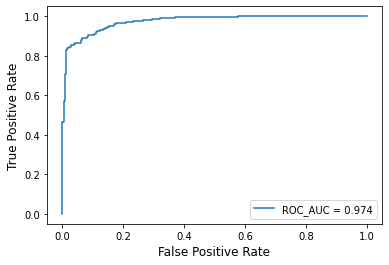

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test_cnn, predictions_cnn)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test_cnn, predictions_cnn)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

**Confusion matrix**

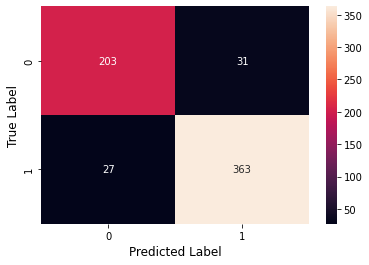

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = metrics.confusion_matrix(Y_test_cnn, pred_labels_cnn)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
Y_test_value = Y_test_cnn.values.flatten()

##**Showing incorrectly predicted samples in the dataset**

In [ ]:
results = pd.DataFrame({'Actual': Y_test_value.flatten(), 'Predicted': pred_labels_cnn.flatten()})
incorrect_df = results[results.Actual!=results.Predicted]
incorrect_df

,Actual,Predicted
6,0,1
13,0,1
16,0,1
21,0,1
26,0,1
42,0,1
44,0,1
48,0,1
61,0,1
69,0,1


# Creating a VGG16 model

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model


tf.keras.backend.clear_session()

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Image_size,Image_size,3))

base_model.trainable = True

for layer in base_model.layers[:-13]:
  layer.trainable = False

def get_pretrained():
  inputs = layers.Input(shape=(Image_size, Image_size, 3))

  x = base_model(inputs)

   # Fine-tuning
  # Head
  x = layers.GlobalMaxPooling2D()(x)
  x = layers.Dense(64, activation='swish')(x)
  x = layers.Dropout(0.2)(x)

  # Final Layer
  output = layers.Dense(1, activation='sigmoid')(x)

  model_vgg16 = tf.keras.Model(inputs=[inputs], outputs=output)

  return model_vgg16


58889256/58889256 [==============================] - 4s 0us/step


##**VGG16 Model Summary**

In [ ]:
model_pretrained = get_pretrained()
model_pretrained.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
                         metrics='binary_accuracy')
model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

In [ ]:
history_vgg16 = model_pretrained.fit(dict_train,
          batch_size = Batch_size, epochs = 15,
          validation_data=dict_val,
          steps_per_epoch=(len(train_df)/Batch_size),
          validation_steps=(len(val_df)/Batch_size));


Epoch 1/15
130/130 [==============================] - 1194s 9s/step - loss: 0.2126 - binary_accuracy: 0.9152 - val_loss: 0.1296 - val_binary_accuracy: 0.9427
Epoch 2/15
130/130 [==============================] - 107s 815ms/step - loss: 0.1089 - binary_accuracy: 0.9575 - val_loss: 0.0826 - val_binary_accuracy: 0.9675
Epoch 3/15
130/130 [==============================] - 107s 814ms/step - loss: 0.0769 - binary_accuracy: 0.9730 - val_loss: 0.0475 - val_binary_accuracy: 0.9819
Epoch 4/15
130/130 [==============================] - 106s 815ms/step - loss: 0.0602 - binary_accuracy: 0.9775 - val_loss: 0.0365 - val_binary_accuracy: 0.9857
Epoch 5/15
130/130 [==============================] - 109s 832ms/step - loss: 0.0540 - binary_accuracy: 0.9799 - val_loss: 0.0356 - val_binary_accuracy: 0.9866
Epoch 6/15
130/130 [==============================] - 107s 818ms/step - loss: 0.0514 - binary_accuracy: 0.9833 - val_loss: 0.0588 - val_binary_accuracy: 0.9771
Epoch 7/15
130/130 [======================

##**Plotting Loss VGG16 (Training dataset vs. Valdiation dataset) where X axis are the epochs**

<Axes: >

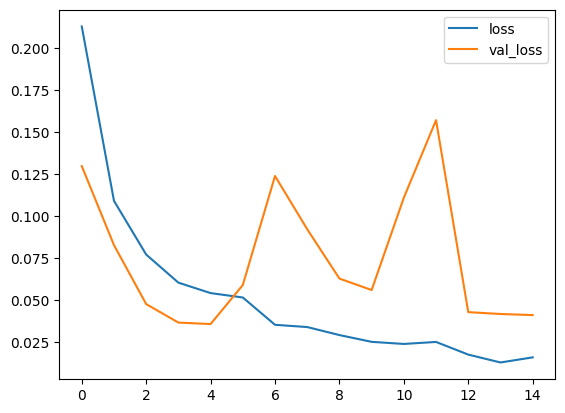

In [ ]:
losses = pd.DataFrame(history_vgg16.history)
losses
losses[['loss', 'val_loss']].plot()


##**Plotting Accuracy Vgg16 (Training dataset vs. Valdiation dataset) where X axis are the epochs**

<Axes: >

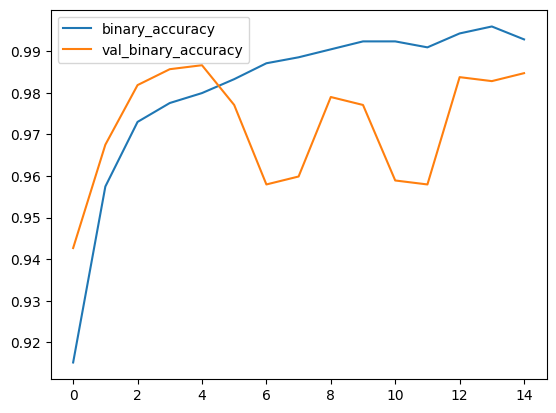

In [ ]:
losses[['binary_accuracy', 'val_binary_accuracy']].plot()

##**Evaluating the VGG16 model performance on the test dataset**

In [ ]:
score = model_pretrained.evaluate(dict_val, steps = len(val_df)/Batch_size, verbose = 0)
print('Val loss:', score[0]*100, '%')
print('Val accuracy:', score[1]*100, '%')

Val loss: 4.092180356383324 %
Val accuracy: 98.47182631492615 %


In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

**Prediction of the Samples using the trained cnn model**

In [ ]:
dict_test.reset()
predictions = model_pretrained.predict(dict_test, steps=len(dict_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

##**Evaluating Test Accuracy on the trained VGG16 model**

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels)*100, '%')

Test Accuracy:  93.26923076923077 %


##**Calculating Precision, Recall, f1-score and Support metrics on the test dataset using the VGG16 trained model**

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       234
           1       0.91      0.99      0.95       390

    accuracy                           0.93       624
   macro avg       0.95      0.91      0.93       624
weighted avg       0.94      0.93      0.93       624



##**Plotting a Roc graph to show performance of the VGG16 model at all thresholds**

ROC_AUC:  0.9946526408064871


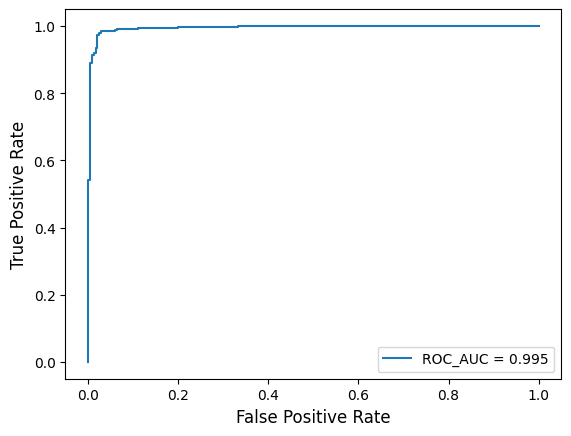

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

**Confusion Matrix**

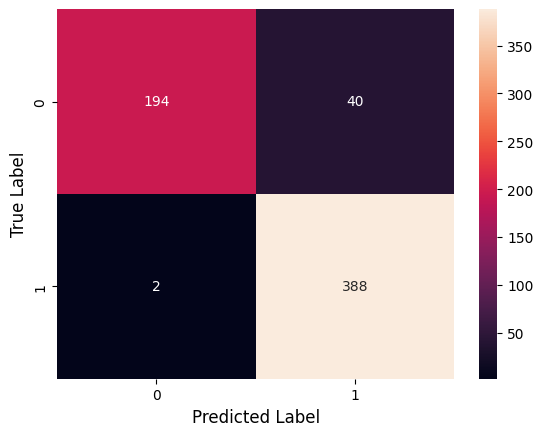

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
Y_test_value_vgg16 = Y_test.values.flatten()

##**Showing incorrectly predicted samples in the dataset for VGG16 model**

In [ ]:
results_vgg16 = pd.DataFrame({'Actual': Y_test_value_vgg16.flatten(), 'Predicted': pred_labels.flatten()})
incorrect_df_vgg16 = results_vgg16[results_vgg16.Actual!=results_vgg16.Predicted]
incorrect_df_vgg16

,Actual,Predicted
4,0,1
6,0,1
11,0,1
13,0,1
16,0,1
17,0,1
23,0,1
24,0,1
26,0,1
34,0,1


In [ ]:
# model_pretrained.save('/content/drive/MyDrive/Colab Notebooks/Vgg16_model.h5')

# Creating a ResNet50V2 model


In [ ]:
from tensorflow.keras.applications import ResNet50V2

tf.keras.backend.clear_session()

def get_pretrained_Resnet():
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(Image_size, Image_size, 3))

    base_model.trainable = True

    for layer in base_model.layers[:-13]:
        layer.trainable = False

    # Head
    inputs = layers.Input(shape=(Image_size, Image_size, 3))
    x = base_model(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='swish')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='swish')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='swish')(x)
    x = layers.Dropout(0.2)(x)

    # Final Layer
    output = layers.Dense(1, activation='sigmoid')(x)

    model_resnet50v2 = tf.keras.Model(inputs=[inputs], outputs=output)

    return model_resnet50v2

In [ ]:
model_pretrained_resnet = get_pretrained_Resnet()
model_pretrained_resnet.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
                         metrics='binary_accuracy')
model_pretrained_resnet.summary()

94668760/94668760 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896  

In [ ]:
history_resnet = model_pretrained_resnet.fit(dict_train,
          batch_size = Batch_size, epochs = 15,
          validation_data=dict_val,
          steps_per_epoch=(len(train_df)/Batch_size),
          validation_steps=(len(val_df)/Batch_size));


Epoch 1/15
130/130 [==============================] - 115s 828ms/step - loss: 0.5515 - binary_accuracy: 0.7284 - val_loss: 0.3585 - val_binary_accuracy: 0.7947
Epoch 2/15
130/130 [==============================] - 108s 825ms/step - loss: 0.3274 - binary_accuracy: 0.8786 - val_loss: 0.2111 - val_binary_accuracy: 0.9456
Epoch 3/15
130/130 [==============================] - 107s 821ms/step - loss: 0.2235 - binary_accuracy: 0.9286 - val_loss: 0.1433 - val_binary_accuracy: 0.9618
Epoch 4/15
130/130 [==============================] - 107s 818ms/step - loss: 0.1640 - binary_accuracy: 0.9451 - val_loss: 0.1200 - val_binary_accuracy: 0.9580
Epoch 5/15
130/130 [==============================] - 106s 807ms/step - loss: 0.1470 - binary_accuracy: 0.9491 - val_loss: 0.1000 - val_binary_accuracy: 0.9656
Epoch 6/15
130/130 [==============================] - 106s 812ms/step - loss: 0.1290 - binary_accuracy: 0.9565 - val_loss: 0.0929 - val_binary_accuracy: 0.9694
Epoch 7/15
130/130 [====================

<Axes: >

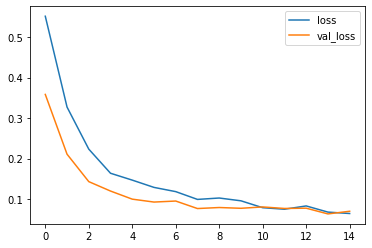

In [ ]:
losses = pd.DataFrame(history_resnet.history)
losses
losses[['loss', 'val_loss']].plot()

<Axes: >

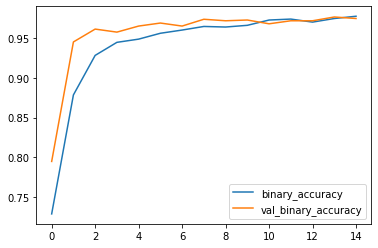

In [ ]:
losses[['binary_accuracy', 'val_binary_accuracy']].plot()

In [ ]:
score = model_pretrained_resnet.evaluate(dict_val, steps = len(val_df)/Batch_size, verbose = 0)
print('Val loss:', score[0]*100, '%')
print('Val accuracy:', score[1]*100, '%')

Val loss: 7.013238966464996 %
Val accuracy: 97.51671552658081 %


In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
dict_test.reset()
predictions = model_pretrained_resnet.predict(dict_test, steps=len(dict_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels)*100, '%')

Test Accuracy:  95.03205128205127 %


In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       234
           1       0.94      0.98      0.96       390

    accuracy                           0.95       624
   macro avg       0.95      0.94      0.95       624
weighted avg       0.95      0.95      0.95       624



ROC_AUC:  0.991606399298707


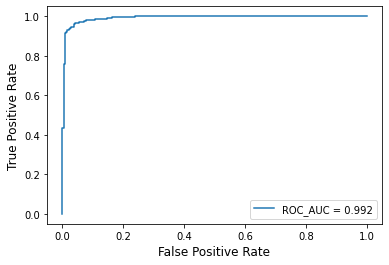

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

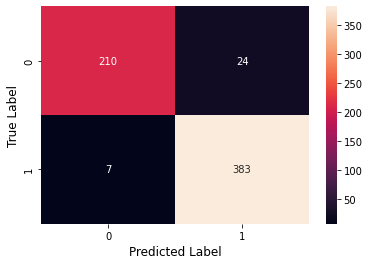

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
Y_test_value_resnet = Y_test.values.flatten()

In [ ]:
results_resnet = pd.DataFrame({'Actual': Y_test_value_resnet.flatten(), 'Predicted': pred_labels.flatten()})
incorrect_df_resnet = results_resnet[results_resnet.Actual!=results_resnet.Predicted]
incorrect_df_resnet

,Actual,Predicted
13,0,1
21,0,1
26,0,1
34,0,1
40,0,1
42,0,1
69,0,1
74,0,1
90,0,1
112,0,1


In [ ]:
# model_pretrained_resnet.save('/content/drive/MyDrive/Colab Notebooks/ResNet50V2.h5')